# __Casos de uso__
## Grupo : 4
## Módulo: 4. INFERENCIA ESTADÍSTICA

<font color='red'>__ATENCIÓN:__:<br>
Indicamos los caso de uso con el nombre del alumno.</font>

#<font color='blue'>**Caso de uso: Cristian Labra Castro**</font>




# Simulación de Montecarlo

En la teoría de la probabilidad y estadística, una cópula es una función de distribución multivariada de probabilidad cuyas distribuciones marginales para cada variable son distribuciones uniformes. Las cópulas describen la estructura de dependencia entre variables aleatorias, no es extraño que la palabra cópula insinúa vínculo o unión, proviene del latín y su significado es conexión o lazo que une dos cosas distintas, similar a las cópulas gramaticales en lingüística. Las cópulas han sido usadas en el área de finanzas y en aplicaciones de optimización de carteras



## 1. Simulación de Montecarlo con Copulas Elípticas.



Primero empezaremos hablando un poco de la __simulación de Montecarlo__, en términos simples consiste en generar números aleatorios para diferentes variables que son inputs de un modelo y con ello podremos analizar los posibles resultados del modelo bajo diferentes escenarios. Uno de los problema a la hora de generar números aleatorios es modelar la correlación entre las diferentes variables y alli es donde entran las cópulas.

Una __cópula__ es una función de distribución multivariada de probabilidad cuyas marginales son distribuciones uniformes, es decir todas sus dimensiones estan entre $[0,1]$ y su ventaja es que permiten modelar facilmente la correlación entre diferentes variables aleatorias independientemente de la distribución de la variable; ya que al modelar la correlación entre las marginales que tienen rango $[0,1]$ se puede aplicar la función inversa de la cdf y se podran obtener variables correlacionadas con diferentes distribuciones.

### A. Cópula Gaussiana.

La cópula gaussiana es una cópula construida a partir de una distribución normal multivariada. Si quieren ver las matemáticas pueden revisar wikipedia en __[este link](https://en.wikipedia.org/wiki/Copula_(probability_theory))__.

El método para generer números aleatorios correlacionados con una cópula gaussiana es el siguiente:
1. A partir de la matriz de correlación calculamos la matriz $L$(descomposición de Cholesky).
1. Generamos una matriz $x$ de números aleatorios independientes con distribución $N(0,1)$.
1. Calculamos la matriz $s = x * L^T$.
1. Aplicamos la función de distribución acumulativa normal $\phi$ a la matriz $s$, de la forma: $U = \phi(s)$.
1. Aplicamos la función de distribución que querramos a cada columna de $U$.

Ahora vamos a mostrar un ejemplo =D. Empezamos cargando una información de precios y calculamos su matriz de correlacion:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import scipy.stats as st
import pandas as pd

data = pd.read_excel('/content/drive/MyDrive/UDD Ciencia de Datos/4.Inferencia Estadistica/Notebooks Para Entrega/Data Prices.xlsx', index_col = 0).sort_index()
data = data.pct_change().dropna().iloc[:,[1,2,6]]

cov = np.cov(data.values.T)
mu = np.mean(data.values, axis=0)
desv = np.sqrt(np.diag(cov))
correl = np.corrcoef(data.values.T)

print("Vector de Medias Original:")
print(mu)
print("")
print("Vector de Desviacion Estandar Original:")
print(desv)
print("")
print("Matriz de Covarianza Original:")
print(cov)
print("")
print("Matriz de Correlación Original:")
print(correl)

Vector de Medias Original:
[4.22112889e-04 4.62537214e-04 6.08295489e-05]

Vector de Desviacion Estandar Original:
[0.00811841 0.00945264 0.0082561 ]

Matriz de Covarianza Original:
[[ 6.59085882e-05  7.01816115e-05 -2.72985388e-05]
 [ 7.01816115e-05  8.93524641e-05 -2.99155314e-05]
 [-2.72985388e-05 -2.99155314e-05  6.81632101e-05]]

Matriz de Correlación Original:
[[ 1.          0.91453233 -0.40728028]
 [ 0.91453233  1.         -0.38332614]
 [-0.40728028 -0.38332614  1.        ]]


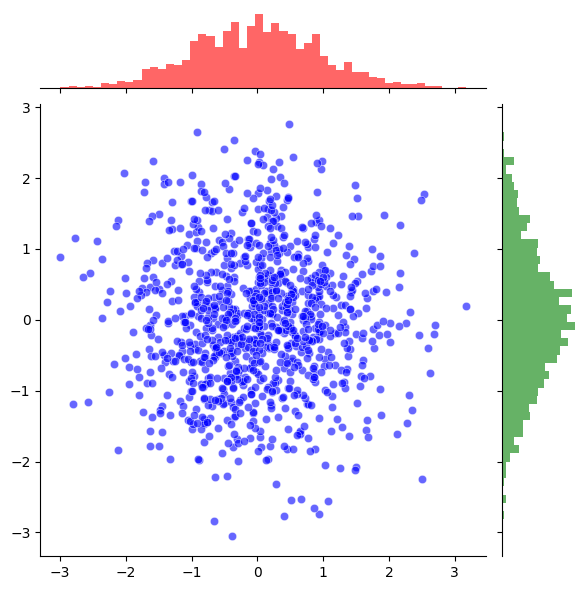

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def hist_scatter(x, y, bins=50):
    g = sns.JointGrid(x=x, y=y)
    g = g.plot_joint(sns.scatterplot, color="b", alpha=.6)
    _ = g.ax_marg_x.hist(x, color="r", alpha=.6,
                         bins=bins)
    _ = g.ax_marg_y.hist(y, color="green", alpha=.6,
                         orientation="horizontal",
                         bins=bins)

np.random.seed(0)
x = np.random.randn(1000, 2)
hist_scatter(x[:,0], x[:,1])

In [ ]:
rs = np.random.RandomState(seed = 0)
n = 10000
m = data.shape[1]
x = rs.randn(n, m)
x = np.matrix(x)
L = np.linalg.cholesky(correl)

s1 = x * L.T
U1 = st.norm.cdf(s1)

x1 = st.norm.ppf(U1)
x1 = np.multiply(x1, desv) + mu

mu_1 = np.mean(x1, axis=0)
cov_1 = np.cov(x1.T)
correl_1 = np.corrcoef(x1.T)

print("Vector de Medias Original:")
print(mu)
print("")
print("Vector de Medias Simulado:")
print(mu_1)
print("")
print("Matriz de Covarianza Original:")
print(cov)
print("")
print("Matriz de Covarianza Simulada:")
print(cov_1)
print("")
print("Matriz de Correlación Original:")
print(correl)
print("")
print("Matriz de Correlación Simulada:")
print(correl_1)

Vector de Medias Original:
[4.22112889e-04 4.62537214e-04 6.08295489e-05]

Vector de Medias Simulado:
[3.61501805e-04 3.96638318e-04 4.61606719e-05]

Matriz de Covarianza Original:
[[ 6.59085882e-05  7.01816115e-05 -2.72985388e-05]
 [ 7.01816115e-05  8.93524641e-05 -2.99155314e-05]
 [-2.72985388e-05 -2.99155314e-05  6.81632101e-05]]

Matriz de Covarianza Simulada:
[[ 6.50662857e-05  6.99443482e-05 -2.78271567e-05]
 [ 6.99443482e-05  8.96661582e-05 -3.03325210e-05]
 [-2.78271567e-05 -3.03325210e-05  6.74887926e-05]]

Matriz de Correlación Original:
[[ 1.          0.91453233 -0.40728028]
 [ 0.91453233  1.         -0.38332614]
 [-0.40728028 -0.38332614  1.        ]]

Matriz de Correlación Simulada:
[[ 1.          0.91571502 -0.41992816]
 [ 0.91571502  1.         -0.38992259]
 [-0.41992816 -0.38992259  1.        ]]


Se puede ver que la serie generada tiene una correlacion similar a la original, sin embargo no es igual. Si graficamos la relación de la primera con segunda columna de $x1$ se obtiene el siguiente grafico:

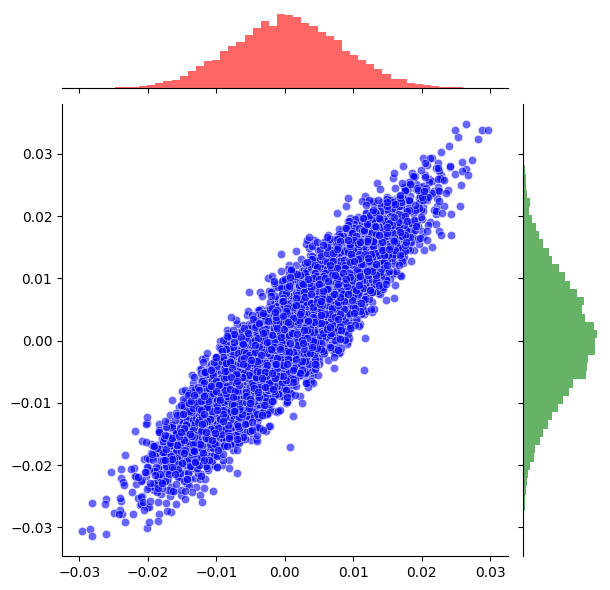

In [ ]:
#Graficando la relacion de la primera y segunda serie simulada
hist_scatter(x1[:,0], x1[:,1])

Sin embargo he descubierto un truco para que la correlación generada sea exactamente igual. Para ello se realiza lo siguiente:

1. Luego de generar la matriz $x$ calculamos su matriz de covarianzas.
1. Aplicamos la factorización de Cholesky sobre la matriz de covarianzas y calculamos $L1$.
1. Calculamos la inversa de $L1$.
1. Actualizamos $x$ con la siguiente formula: $x = x * L1^{-1}$.
1. Repetimos este proceso como 3 veces y sobre el nuevo $x$ aplicamos la matriz $L$ del método original.

Ahora vamos a ver un ejemplo =D para que vean como se hace:

In [ ]:
x = rs.randn(n, m)
x = np.matrix(x)
for i in range(0,3):
    c1 = np.cov(x.T)
    L1 = np.linalg.cholesky(c1)
    L1 = np.matrix(L1).I
    x = x * L1.T

s2 = x * L.T
U2 = st.norm.cdf(s2)
x2 = st.norm.ppf(U2)
x2 = np.multiply(x2, desv) + mu

mu_2 = np.mean(x2, axis=0)
cov_2 = np.cov(x2.T)
correl_2 = np.corrcoef(x2.T)

print("Vector de Medias Original:")
print(mu)
print("")
print("Vector de Medias Simulado con el ajuste:")
print(mu_2)
print("")
print("Matriz de Covarianza Original:")
print(cov)
print("")
print("Matriz de Covarianza Simulada con el ajuste:")
print(cov_2)
print("")
print("Matriz de Correlación Original:")
print(correl)
print("")
print("Matriz de Correlación Simulada con el ajuste:")
print(correl_2)


Vector de Medias Original:
[4.22112889e-04 4.62537214e-04 6.08295489e-05]

Vector de Medias Simulado con el ajuste:
[0.00029427 0.00034037 0.00019839]

Matriz de Covarianza Original:
[[ 6.59085882e-05  7.01816115e-05 -2.72985388e-05]
 [ 7.01816115e-05  8.93524641e-05 -2.99155314e-05]
 [-2.72985388e-05 -2.99155314e-05  6.81632101e-05]]

Matriz de Covarianza Simulada con el ajuste:
[[ 6.59085882e-05  7.01816115e-05 -2.72985388e-05]
 [ 7.01816115e-05  8.93524641e-05 -2.99155314e-05]
 [-2.72985388e-05 -2.99155314e-05  6.81632101e-05]]

Matriz de Correlación Original:
[[ 1.          0.91453233 -0.40728028]
 [ 0.91453233  1.         -0.38332614]
 [-0.40728028 -0.38332614  1.        ]]

Matriz de Correlación Simulada con el ajuste:
[[ 1.          0.91453233 -0.40728028]
 [ 0.91453233  1.         -0.38332614]
 [-0.40728028 -0.38332614  1.        ]]


Ahora podran ver que ambas matrices son identicas, con esto se mejora la precision de la simulación.  Si graficamos la relación de la primera con segunda columna de $x2$ se obtiene el siguiente grafico:

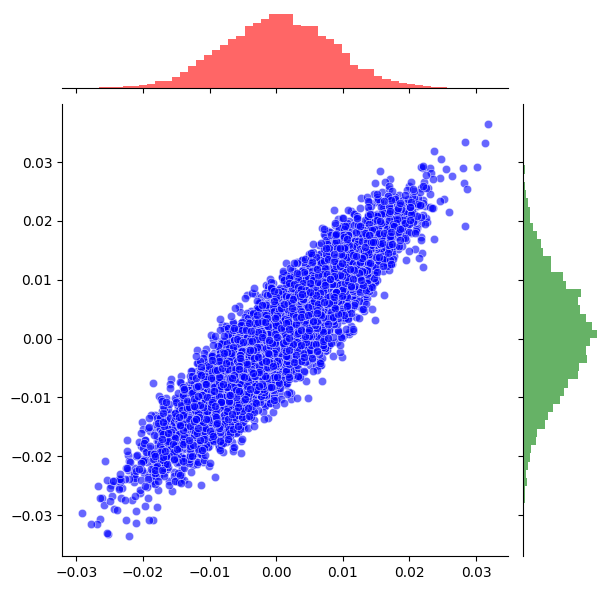

In [ ]:
hist_scatter(x2[:,0], x2[:,1])

Ahora para demostrar que podemos generar cualquier tipo de distribución correlacionada, usando la simulación anterior aplicaremos las inversas acumulativas de las distribuciones normal, t y uniforme para calcular las nuevas distribuciones correlacionadas.

In [ ]:
x3 = st.norm.ppf(U2)
x3[:,0] = st.norm.ppf(U2[:,0], loc=0.5, scale=0.3)
x3[:,1] = st.t.ppf(U2[:,1], df = n - 1)
x3[:,2] = st.uniform.ppf(U2[:,2])

correl_3 = np.corrcoef(x3.T)

print("Matriz de Correlación Original:")
print(correl)
print("")
print("Matriz de Correlación Simulada con el ajuste:")
print(correl_3)

Matriz de Correlación Original:
[[ 1.          0.91453233 -0.40728028]
 [ 0.91453233  1.         -0.38332614]
 [-0.40728028 -0.38332614  1.        ]]

Matriz de Correlación Simulada con el ajuste:
[[ 1.          0.91453253 -0.39532122]
 [ 0.91453253  1.         -0.37264219]
 [-0.39532122 -0.37264219  1.        ]]


Graficando la relacion de la serie con distribucion normal y t:

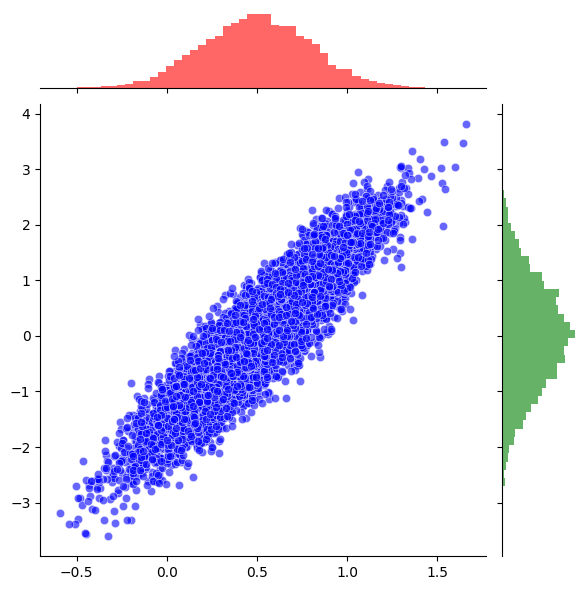

In [ ]:
hist_scatter(x3[:,0], x3[:,1])

Graficando la relacion de la serie con distribucion normal y uniforme:

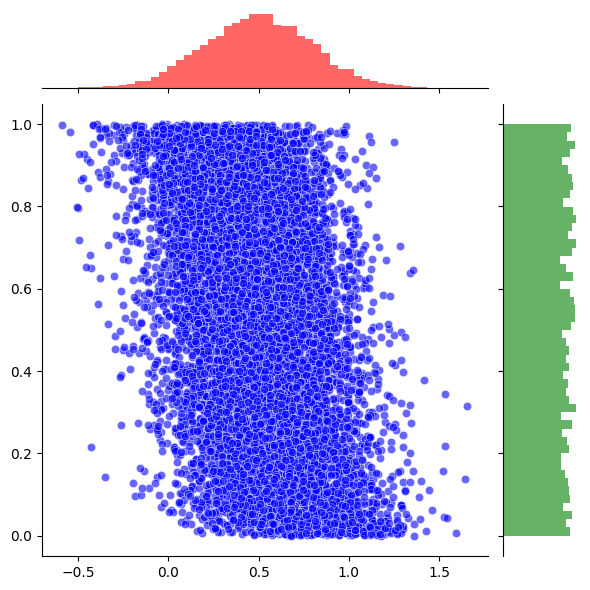

In [ ]:
hist_scatter(x3[:,0], x3[:,2])

Y con eso pueden ver que se han generados muestras de distintas distribuciones correlacionadas.

### B. Cópula t-Student.

La cópula t-Student es una cópula construida a partir de una distribución t-Student multivariada. Si quieren ver las matemáticas pueden revisar el paper de __[este link](http://www.ressources-actuarielles.net/EXT/ISFA/1226.nsf/0/303eb11b4d617b79c1257b0800744575/$FILE/t%20copula%20demarta%20mcneil.pdf)__.

El método para generer números aleatorios correlacionados con una cópula t-Student es el siguiente:
1. A partir de la matriz de correlación calculamos la matriz $L$(descomposición de Cholesky).
1. Calculamos los grados de libertad con la fórmua $\nu = (n-1)*d$, donde $d$ es el numero de dimensiones y $n$ el número de observaciones a simular.
1. Generamos un vector $V$ de dimension  de números aleatorios independientes con distribución $\chi(\nu)$.
1. Generamos una matriz $x$ de números aleatorios independientes con distribución $N(0,1)$.
1. Calculamos la matriz $s = \sqrt{\frac{\nu}{V}} * (x * L^T)$.
1. Aplicamos la función de distribución acumulativa t-Student $t_{\nu}$ a la matriz $s$, de la forma: $U = t_{\nu}(s)$.
1. Aplicamos la función de distribución que querramos a cada columna de $U$.

Ahora vamos a mostrar un ejemplo =D de la simulación con la cópula t-Student:

In [ ]:
x = rs.randn(n, m)
x = np.matrix(x)

v = (n - 1) * m
V = rs.chisquare(v, size = (n, 1))

s4 = np.sqrt(v/V) * np.array(x * L.T)
U4 = st.t.cdf(s4, v)

x4 = st.t.ppf(U4, v)
#x4[:,0] = st.norm.ppf(U4[:,0])
#x4[:,1] = st.t.ppf(U4[:,1], df = 2)
#x4[:,2] = st.uniform.ppf(U4[:,2])

correl_4 = np.corrcoef(x4.T)

print("Matriz de Correlación Original:")
print(correl)
print("")
print("Matriz de Correlación Simulada sin el ajuste:")
print(correl_4)

Matriz de Correlación Original:
[[ 1.          0.91453233 -0.40728028]
 [ 0.91453233  1.         -0.38332614]
 [-0.40728028 -0.38332614  1.        ]]

Matriz de Correlación Simulada sin el ajuste:
[[ 1.          0.91659142 -0.41285512]
 [ 0.91659142  1.         -0.39114058]
 [-0.41285512 -0.39114058  1.        ]]


Se aprecia que al igual que para las copulas gaussianas, la aproximación no es muy buena. Si aplicamos el truco de anterior:

In [ ]:
x = rs.randn(n, m)
x = np.matrix(np.sqrt(v/V) * np.array(x))

for i in range(0,3):
    c1 = np.cov(x.T)
    L1 = np.linalg.cholesky(c1)
    L1 = np.matrix(L1).I
    x = x * L1.T

s5 = x * L.T
U5 = st.t.cdf(s5, v)

x5 = st.t.ppf(U5, v)

correl_5 = np.corrcoef(x5.T)

print("Matriz de Correlación Original:")
print(correl)
print("")
print("Matriz de Correlación Simulada con el ajuste:")
print(correl_5)

Matriz de Correlación Original:
[[ 1.          0.91453233 -0.40728028]
 [ 0.91453233  1.         -0.38332614]
 [-0.40728028 -0.38332614  1.        ]]

Matriz de Correlación Simulada con el ajuste:
[[ 1.          0.91453233 -0.40728028]
 [ 0.91453233  1.         -0.38332614]
 [-0.40728028 -0.38332614  1.        ]]


Ahora pueden ver que la correlacion ha mejorado comparado a la simulación anterior.

Usando la simulación anterior aplicaremos las inversas acumulativas de las distribuciones normal, t y uniforme para calcular las nuevas distribuciones correlacionadas.

In [ ]:
x6 = st.t.ppf(U5, v)
x6[:,0] = st.norm.ppf(U5[:,0])
x6[:,1] = st.t.ppf(U5[:,1], df = n - 1)
x6[:,2] = st.uniform.ppf(U5[:,2])

correl_6 = np.corrcoef(x6.T)

print("Matriz de Correlación Original:")
print(correl)
print("")
print("Matriz de Correlación Simulada con el ajuste:")
print(correl_6)

Matriz de Correlación Original:
[[ 1.          0.91453233 -0.40728028]
 [ 0.91453233  1.         -0.38332614]
 [-0.40728028 -0.38332614  1.        ]]

Matriz de Correlación Simulada con el ajuste:
[[ 1.          0.91453226 -0.3952915 ]
 [ 0.91453226  1.         -0.37008472]
 [-0.3952915  -0.37008472  1.        ]]


Graficando la relacion de la serie con distribucion normal y uniforme:

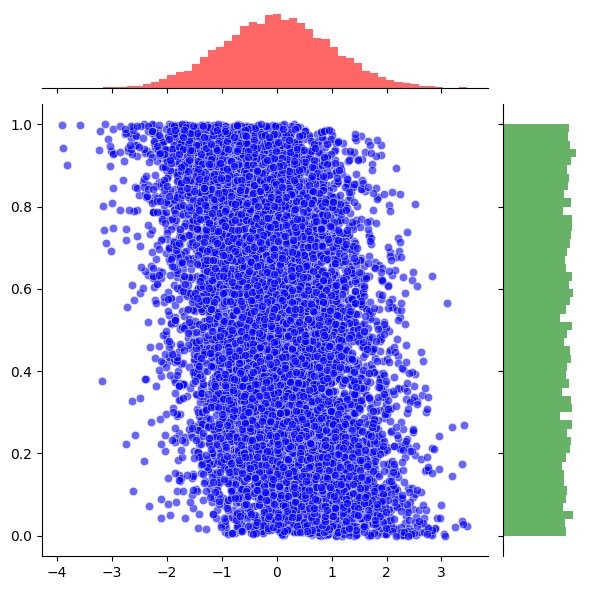

In [ ]:
hist_scatter(x6[:,0], x6[:,2])

Fin



---



#<font color='blue'>**Caso de uso: Javier González Pacheco**</font>
##*** Presentación de un taller de inferencia estadistica para una carrera de ingenieria ***

###La idea, es mostrar en un taller practico a una carrera de ingenieria en la Universidad (pregrado) el uso de Python y la libreria scipy.stats.

###Nos centraremos en dos aspectos fundamentales: calcular estimadores y construir intervalos de confianza. Los estimadores son valores numéricos que buscan aproximarse a parámetros desconocidos, mientras que los intervalos de confianza nos ayudan a cuantificar la certidumbre asociada a estas estimaciones.

###Tomaremos una muestra aleatoria (n=30) y definiremos los parametros que usaremos para generar la muestra. Calcularemos algunos estadsiticos que nos serviran para la contruccion de los intervalos de confianda.

###Mostraremos como se construyen estos intervalos "a mano" y como se obtiene con la libreria scipy.stats, finalmente mostraremos una compracion para estos intervalos usando una normal y la t-Student.


### vamos a generar una muestra aleatoria de una distribución normal, el generador de numeros ira con una semilla.

In [ ]:
import pandas as pd
import scipy.stats as st

In [ ]:
seed = 1000  # semilla para la generacion
n= 30        # Tamaños muestra
alpha = 0.05 # nivel de significancia
mu = 1.5     # media de la oblacion
std = 0.75   # desviasion estandar de la poblacion

df = pd.DataFrame({'x':st.norm.rvs(mu, std, n, random_state=seed)})
df.head(5).T

,0,1,2,3,4
x,0.896656,1.740699,1.480888,1.983243,1.274402


### Calculamos algunas 'estadísticas' para la muestra.

In [ ]:
import numpy as np
import math

In [ ]:
# y_barra
m = np.round(df.x.mean(), 2)

# sigma_sombrero
s = np.round(df.x.std(), 2)

# Error estandard de la media con sigma conocida
s_m_conocida = np.round(std/math.sqrt(n), 2)

# Error estandard de la media con sigma desconocida
s_m_desconocida = np.round(s/math.sqrt(n), 2)

print('Media de la muestra: ', m)
print('Desviasión estandard de la muestra: ', s)
print('Error estad. de la media, suponiendo varianza conocida', s_m_conocida)
print('Error estad. de la media, suponiendo varianza desconocida', s_m_desconocida)

Media de la muestra:  1.53
Desviasión estandard de la muestra:  0.54
Error estad. de la media, suponiendo varianza conocida 0.14
Error estad. de la media, suponiendo varianza desconocida 0.1


### La estimación puntual de la población, utilizando la media muestral es bastante buena (1.53 que estima 1.5), sin embargo, la estimación puntual de la desviasión estandar poblacional, utilizando la desviasión estandar muestral 's' ya no parece tan buena (0.54 que estima 0.75).      

## Intervalos de confianza usando la normal

In [ ]:
print("Intervalos teóricos del ", (1-alpha)*100, "% de confianza")
print()

print("Usando la normal:")
z = st.norm.ppf(1 - alpha/2)
print("z_alpha/2 = ", round(z,2))
print()

print("Conociendo la desviasión estandard:")
print("mu_x = [", round(m-z*s_m_conocida, 2), "; ", round(m+z*s_m_conocida, 2), "]")
print()

print("Estimando la desviasión estandard:")
print("mu_x = [", round(m-z*s_m_desconocida, 2), "; ", round(m+z*s_m_desconocida, 2), "]")
print()

print("Calculados por scipy.stats:")
print("mu_x (sigma conocida) = ", np.round(st.norm.interval(1-alpha, m, s_m_conocida), 2))
print("mu_x (sigma desconocida) = ", np.round(st.norm.interval(1-alpha, m, s_m_desconocida), 2))

Intervalos teóricos del  95.0 % de confianza

Usando la normal:
z_alpha/2 =  1.96

Conociendo la desviasión estandard:
mu_x = [ 1.26 ;  1.8 ]

Estimando la desviasión estandard:
mu_x = [ 1.33 ;  1.73 ]

Calculados por scipy.stats:
mu_x (sigma conocida) =  [1.26 1.8 ]
mu_x (sigma desconocida) =  [1.33 1.73]


## Intervalos de confianza usando la t-Student

In [ ]:
print("Usando la t-Student: ")
print()

print("Usando la desviasión estandard de la media:")
print("mu_x:", np.round(st.t.interval(1-alpha, df=n-1, loc=m, scale=s_m_conocida), 2))
print()

print("Estimando la desviasión estandard de la media:")
print("mu_x:", np.round(st.t.interval(1-alpha, df=n-1, loc=m, scale=s_m_desconocida), 2))

Usando la t-Student: 

Usando la desviasión estandard de la media:
mu_x: [1.24 1.82]

Estimando la desviasión estandard de la media:
mu_x: [1.33 1.73]


### Podemos hacer intervalos utilizando la normal, pero considerando que en una situación de datos reales se desconoce la varianza poblacional, el más correcto de los intervalos de confianza producidos es el último, utilizando la t-Student. Como el tamaño de la muestra es suficiente, ambos intervalos son virtualmente iguales.

### En el caso de utilizar α=0.05, el intervalo se interpreta como que de cada 100 muestras que tomemos, en 95 oportunidades estamos esperando que el verdadero valor de la media poblacional, esté entre 1.33 y 1.73    

# FIN!!

#<font color='blue'>**Caso de uso: Maurizio Frola**</font>
##***Calculando la probabilidad de innovar de empresas chilenas utilizando la Onceava Encuesta de Inovación de Empresas ENI11. Y poniendo a prueba el efecto de una política pública de subsidio a la innovación.***

Se propone utilizar las herramientas estudiadas en este módulo junto a los datos presentes en la ENI11. La ENI tiene una periodicidad bienal y el período de referencia para esta versión son los años 2018 y 2017.

SE PRESENTA PSEUDOCÓDIGO DEBIDO A DIFICULTADES DE TRABAJO CON LOS DATOS DE LAS ENCUESTAS.

Diseño estadístico:

Universo: Se compone de todas aquellas empresas presentes en el Directorio Nacional de Empresas, año 2017 (DNE 2017) y que pertenecen a alguna de las actividades en estudio, según la Clasificación Industrial Internacional Uniforme de todas las Actividades Económicas, Revisión 4 de Naciones Unidas (CIIU Rev. 4), en su adaptación nacional (CIIU4.CL 2012).

Población: Está constituida por empresas formales11 que desarrollan su actividad económica principal en alguno de los sectores productivos en estudio según la CIIU4.CL 2012, dentro de los límites geográficos del país, y que durante el año contable 2017 alcanzaron ventas anuales superiores a 2.400 Unidades de Fomento (UF)12.

Unidad estadística: La unidad de muestreo es la empresa formal13 que cumple los requisitos para formar parte de la población objetivo.

Conformación del marco muestral: El marco muestral es elaborado a partir de cuatro fuentes de información, que varían según la actividad económica en estudio (Directorio Nacional de Empresas (DNE) 2017, Directorio Índice de Producción Minera 2016, Directorio Encuesta Nacional Industrial Anual (ENIA) 2016, Directorio Índice de Electricidad, Gas y Agua (EGA) 2016).

Se depura el marco muestral eliminando los registros duplicados, siendo necesario decidir la información que se mantiene cuando existen empresas con información diferente según el directorio. Una vez construido el marco muestral, se realiza la estratificación. Ésta permite reunir elementos de una población en grupos homogéneos previo a la selección, con el propósito de mejorar las medidas de precisión de las estimaciones agrupando las unidades del marco muestral en clases homogéneas en su interior y que difieran de las características del resto. Los estratos deben ser mutuamente excluyentes y exhaustivos colectivamente, es decir, cada elemento en la población debe ser asignado a un solo estrato y ninguno puede quedar excluido.

El diseño muestral de la XI ENI es probabilístico y estratificado (donde los estratos quedan definidos según actividad económica, tamaño de empresa, macrozona y tramo), a excepción de las actividades de “Minería” (B) y “Suministro de electricidad, gas y agua” (D-E), para las cuales se incluye forzosamente la totalidad de empresas del marco muestral en la muestra.

La encuesta cuenta con factores de expansión para expandir a caracter poblacional la muestra efectuada, sin embargo no se contemplará la complejidad de representatividad poblacional para este ejercicio de CASO DE USO particular, por motivos de simplicidad.

En primer lugar podremos el objetivo de ver la media del porcentaje de gasto en innovación partido las ventas totales de una empresa promedio del país para los años 2017 y 2018.

In [ ]:
# Importamos librerías y base de datos (desde .dta porque la base se encuentra en ese formato)
import numpy as np #
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import pandas.testing as tm

from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/'
ENI11_df = pd.read_stata(path + "ENI 11 sector.dta")

In [ ]:
#Visualizamos df
ENI11_df.info()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
ENI11_df.head()

In [ ]:
pd.reset_option('display.max_columns')

VARIABLES A UTILIZAR:


In [ ]:
# Ventas Totales 2017: P200
# Ventas Totales 2018: P201
#TOTAL GASTO ACTIVIDADES INNOVATIVAS 2017: P3342
#TOTAL GASTO ACTIVIDADES INNOVATIVAS 2018: P3343

columns_to_keep = ['P200', 'P201', 'P3342', 'P3343']
df_selected_1 = ENI11_df[columns_to_keep]
new_column_names = {'P200': 'Ventas_2017', 'P201': 'Ventas_2018', 'P3342': 'Gasto_ID_2017', 'P3343': 'Gasto_ID_2018'}
df_selected_1.rename(columns=new_column_names, inplace=True)
#null_values = df_selected_1.isnull()
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
df_selected_1.describe()

In [ ]:
Innovation_Ratio_2017 = df_selected_1['Gasto_ID_2017'] / df_selected_1['Ventas_2017'] #Creamos ratio para "Gasto en innovación dividido por ventas totales 2017"
Innovation_Ratio_2018 = df_selected_1['Gasto_ID_2018'] / df_selected_1['Ventas_2018'] #Creamos ratio para "Gasto en innovación dividido por ventas totales 2018"
df_selected_1['Innovation_Ratio_2017'] = Innovation_Ratio_2017 #Añadimos al dataframe
df_selected_1['Innovation_Ratio_2018'] = Innovation_Ratio_2018 #Añadimos al dataframe

pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))
df_selected_1.head(100)

In [ ]:
null_counts = df_selected_1.isnull().sum()# vemos valores nulos
print(null_counts)
df_selected_1= df_selected_1.dropna() #Dropeamos nulos de los ratios

In [ ]:
null_counts = df_selected_1.isnull().sum()# vemos valores nulos
print(null_counts)

Ahora definimos nuestros datos para ver el intervalo de confianza del ratio de gasto en innovación respecto a las ventas de las empresas para el año 2017:

1) Calcular un Intervalo de Confianza del 95% y para la media poblacional.

2) Visualizar la distribución y el límite.

In [ ]:
# Caso NC = 0.95, tenemos una muestra mucho mayor a 30, aplicaremos Z(0,1) (Distribucion normal estandarizada)
n= len(df_selected_1) # n de la muestra
xbar = df_selected_1['Innovation_Ratio_2017'].mean() # Promedio de ratio de innovación 2017
S = df_selected_1['Innovation_Ratio_2017'].std() #Desviación estandar de ratio de innovación 2017
S_xbar = S / np.sqrt(n)

# IC con NC 95%
NC = 0.95
alpha = 1 - NC
alpha_medio = alpha / 2

Z = stats.norm.ppf(1 - alpha_medio) # Calcular Z con la función de distribución normal acumulada inversa (ppf)

LI = xbar - Z * (S / np.sqrt(n))
LS = xbar + Z * (S / np.sqrt(n))

#Graficando la distribucion normal de poblacion y medias

# proyectar distribución población
poblacion = stats.norm(xbar, S)
x = np.linspace(poblacion.ppf(0.01), poblacion.ppf(0.95), 100)
pdf = poblacion.pdf(x) # función densidad probabilidad

# proyectar distribución medias n=172
medias = stats.norm(xbar, S_xbar)
x_m = np.linspace(medias.ppf(0.00000001), medias.ppf(0.99999999), 100)
pdf_m = medias.pdf(x_m) # función densidad probabilidad

LI = xbar - Z * (S_xbar)
LS = xbar + Z * (S_xbar)

plt.figure(figsize=(15, 5)) # tamaño gráfico
plt.plot(x, pdf,"r") # poblacion fit
plt.plot(x_m, pdf_m,"b") # medias fit
plt.vlines(ymin=0, ymax=0.3, x=(LI, LS))# LI & LS IC
plt.fill_between(x_m, pdf_m,
                 where=(x_m >= LI) & (x_m <= LS),
                 color='b', alpha=0.2, label='Prob >= 0.95')
plt.legend(['Población','Muestras', 'IC 95%', '0.025 $\leq$ x $\leq$ 0.025'])
plt.show()

# Solo para comprobar:
# calcular probabilidad de tomar una muestra y que ésta tenga una media menor al LS del IC
prob_acum_LS = stats.norm(xbar, S_xbar).cdf(LS)
print(f'La probabilidad es: {prob_acum_LS:6.4f}')
IC95 = stats.norm.interval(NC, loc = xbar, scale = S_xbar)
print(f'IC al {NC} para media poblacional:  {IC95[0]:4.2f}, {IC95[1]:4.2f}')

Supongamos que en los resultados anteriores obtuvimos que las empresas en chile gastan en innovación en promedio un 0.5% de sus ventas.

Cual es la probabilidad de que una empresa en chile gaste a lo menos 1% de sus ingresos en ventas en innovación?

In [ ]:
poblacion = stats.norm(xbar, S)
x = np.linspace(poblacion.ppf(0.01), poblacion.ppf(0.95), 100)
pdf = poblacion.pdf(x) # función densidad probabilidad

# proyectar distribución medias n=172
medias = stats.norm(xbar, S_xbar)
x_m = np.linspace(medias.ppf(0.0000001), medias.ppf(0.9999999), 100)
pdf_m = medias.pdf(x_m) # función densidad probabilidad

limite = 0.01

plt.figure(figsize=(15, 5)) # tamaño gráfico
plt.plot(x, pdf,"r") # poblacion fit
plt.plot(x_m, pdf_m,"b", ) # medias fit
plt.vlines(ymin=0, ymax=0.3, x=limite)# LS IC
plt.fill_between(x_m, pdf_m,
                 where=(x_m >= limite),
                 color='b', alpha=0.2, label='Prob >= 0.01')
plt.legend(['Población','Muestras', 'IC 95%', 'Prob x $\geq$ 0.01'])
plt.show()
prob1= stats.norm(10.88, S_xbar).sf(limite) # se calcula el complemento con .sf
print(f'Probabilidad de que la media de gasto en innovación sea sobre 0.01 es: {prob1:6.4f}') #Nos arroja la probabilidad de que una
#empresa gaste más del 1% de sus ventas en innovación

3) Suponemos que elegimos a 200 empresas de nuestra muestra para otorgarles un subsidio en función de sus ventas, en donde se les entrega un 1% del valor de sus ventas totales del 2017, para realizar innovación.

Vemos los resultados y nos encontramos que el nuevo promedio de ratio de inversión en innovación sobre las ventas de estas empresas es de 1.7%

Con esta información nos proponemos a calcular el poder estadístico de una prueba de hipótesis:
Ho = 0.5%
H1 = 0.7%

Esta podría implicar que podría existir un efecto positivo del incentivo a gastar más en innovación, superior al subsidio entregado.

In [ ]:
# Cargamos data línea base
xbar = 0.5%
S = Sigma_ENI11

# Resltados del tratamiento
n = 200
x_bar = 0.7%
# Tamaño del efecto
efecto = x_bar - Mu #12 munutos de diferencia

# 1) Definir hipótesis a contrastar (prueba unilateral - cola derecha)
alpha = 0.05

 # H0:   Mu = 200
 # H1:   Mu =  212


# 2) Buscar valor crítico de Z
Zcritico = stats.norm.ppf(1-alpha)# 1 cola
print(f'Z crítico: {Zcritico: 4.2f}')

# 3) Calcular el valor en minutos correspondiente al Z crítico
valor_minutos_zcritico= stats.norm(Mu, Sigma/np.sqrt(n)).ppf(1-alpha)
print(f"Valor media para Z crítico: {valor_minutos_zcritico: 4.2f}")
# Visualizando la distribución de las medias muestrales y límites

# Proyectar distribución H0
muestral_z = stats.norm(Mu, Sigma/np.sqrt(n))
x_z0 = np.linspace(muestral_z.ppf(0.0001), muestral_z.ppf(0.9999), 100)
pdf_z0 = muestral_z.pdf(x_z0) # función densidad probabilidad


# Proyectar distribución H1
muestral_z = stats.norm(x_bar, Sigma/np.sqrt(n))
x_z1 = np.linspace(muestral_z.ppf(0.0001), muestral_z.ppf(0.9999), 100)
pdf_z1 = muestral_z.pdf(x_z1) # función densidad probabilidad

# Ploteo de gráficos principales
plt.figure(figsize=(12, 8)) # tamaño gráfico
plt.plot(x_z0, pdf_z0, color='b', label='$H_0 \quad$ Distribución medias muestrales de tamaño $n$') # medias H0
plt.plot(x_z1, pdf_z1, color='orange', label='$H_1 \quad$ Distribución medias muestrales de tamaño $n$ + Efecto') # medias H1

# Ploteo de líneas verticales
plt.vlines(ymin=0, ymax=0.085, x=valor_minutos_zcritico,  colors='r', label='$Z_{critico}$', zorder=9)
plt.vlines(ymin=0, ymax=0.085, x=Mu,  colors='b', alpha=0.3, label='$\mu \quad H_0$', zorder=9)
plt.vlines(ymin=0, ymax=0.085, x=x_bar,  colors='orange', alpha=0.3, label=r'$\bar{x} \quad H_1$', zorder=9)
plt.ylim(-0.03, 0.12)
plt.yticks([])

# Ploteo de línea horizontal
plt.hlines(xmin=min(x_z0)*0.98, xmax=max(x_z1)*1.02, y=0,  colors='k', alpha=1, zorder=10)

# Relleno (fill) de áreas
# Fill de 1 - alfa
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 < valor_minutos_zcritico),
                 color='b', alpha=0.1, label=r'$1-\alpha$')
# Fill de 1 - beta (Potencia)
plt.fill_between(x_z1, pdf_z1,
                 where = (x_z1 > valor_minutos_zcritico),
                 color='orange', alpha=0.1, label=r'$1 - \beta$, Poder')
# Fill de alfa (Error tipo I)
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 > valor_minutos_zcritico) & (x_z0 <= x_bar),
                 color='r', alpha=0.4, label=r'$\alpha$, Error Tipo I')
# Fill de beta (Error tipo II)
plt.fill_between(x_z1, pdf_z1,
                 where = (x_z1 < valor_minutos_zcritico),
                 color='g', alpha=0.4, label=r'$\beta$, Error Tipo II')
# Fill de p-value
plt.fill_between(x_z0, pdf_z0,
                 where = (x_z0 > x_bar),
                 color='r', hatch='|||', alpha=0.4, label=r'p-value')

# Textos y anotaciones
plt.text(Mu, 0.04, r'$1-\alpha$', fontsize=12, ha='center')
plt.text((Mu + ((valor_minutos_zcritico-Mu)*2/3)), 0.005, r'$\beta$', fontsize=12)
plt.text((valor_minutos_zcritico + ((x_bar-valor_minutos_zcritico)/5)), 0.005, r'$\alpha$', fontsize=12)
plt.text(x_bar*1.01, 0.005, r'$p-value$', fontsize=12)
plt.text(x_bar, 0.04, r'Poder $(1-\beta)$', fontsize=12, ha='center')
plt.text(Mu, 0.09, r'$H_0$', fontsize=12, ha='center')
plt.text(valor_minutos_zcritico, 0.09, r'$Z_{critico}$', fontsize=12, ha='center')
plt.text(x_bar, 0.09, r'$H_1$', fontsize=12, ha='center')

# Tamaño del efecto
plt.hlines(xmin=Mu, xmax=x_bar, y=0.104,  colors='cyan', alpha=0.5, label='Tamaño del efecto')
plt.vlines(ymin=0.102, ymax=0.106, x=Mu,  colors='cyan', alpha=0.5)
plt.vlines(ymin=0.102, ymax=0.106, x=x_bar,  colors='cyan', alpha=0.5)
plt.text((Mu + (x_bar-Mu)/2), 0.106, r'Tamaño del efecto', fontsize=12, ha='center')

# Zonas de rechazo y no rechazo
plt.hlines(xmin=min(x_z0), xmax=max(x_z1), y=-0.01,  colors='magenta', alpha=0.5, label='Zonas de Rechazo / No rechazo')
plt.vlines(ymin=-0.008, ymax=-0.012, x=min(x_z0),  colors='magenta', alpha=0.5)
plt.vlines(ymin=-0.008, ymax=-0.012, x=valor_minutos_zcritico,  colors='magenta', alpha=0.5)
plt.vlines(ymin=-0.008, ymax=-0.012, x=max(x_z1),  colors='magenta', alpha=0.5)
plt.text((min(x_z0) + ((valor_minutos_zcritico-min(x_z0))/2)), -0.015, r'Zona de no rechazo', fontsize=12, ha='center')
plt.text((valor_minutos_zcritico + ((max(x_z1)-valor_minutos_zcritico)/2)), -0.015, r'Zona de rechazo', fontsize=12, ha='center')

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

Ahí tendríamos la visualización de las distribuciones

In [ ]:
Poder = stats.norm(x_bar, Sigma/np.sqrt(n)).sf(valor_minutos_zcritico)
print(f'Poder de la prueba: {Poder: 4.2f}')

Con esto determinamos el poder de la prueba de hipótesis, lo que nos permitiría efectuar parte de una evaluación de impacto de política pública para innovación.

***

#<font color='blue'>**Caso de uso: Carol Díaz Lagos**</font>
##Análisis datos de sísmos (USGS)



El USGS (Servicio Geológico de los Estados Unidos) proporciona una variedad de herramientas y recursos para la visualización de sismos que permiten a los científicos, investigadores, profesionales de la gestión de desastres y al público en general comprender mejor la actividad sísmica en todo el mundo.


Con la información disponible en línea, podemos hacer realizar seguimiento en tiempo real que muestran ubicación, magnitud, profundidad, entre otros datos, de los sismos en todo el mundo. Esto permite a las personas seguir la actividad sísmica actual y estar al tanto de cualquier evento importante.


A modo de ejemplo, visualizamos la distribución de magnitudes de terremotos utilizando diferentes técnicas gráficas y estadísticas. Estas representaciones pueden ayudar a identificar patrones o características en los datos sísmicos, aunque para un análisis más exhaustivo necesitamos data histórica y otros datos disponibles en los sismómetros y acelerómetros.

Para el analisis utilizaremos el data set disponible en portal de USGS de los sismos sobre 2.5 de magnitud ocurridos en los últimos 30 días (https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_month.cs)

Utilizaremos Poisson para para modelar la frecuencia de magnitudes de terremotos, ya que son eventos independientes entre sí. En el contexto de los terremotos, se puede asumir que la ocurrencia de terremotos de cierta magnitud en un área no afecta la ocurrencia de terremotos de la misma magnitud en otra área durante el mismo período de tiempo.

Para visualizar la distribución de magnitudes de terremotos puede ayudar a identificar patrones locales o agrupamientos de magnitudes, pudiendo observar si hay una concentración de terremotos en un rango específico de magnitudes.





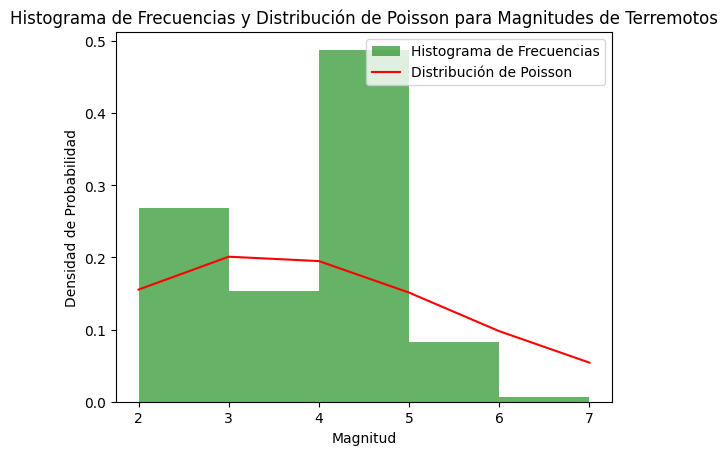

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson

import seaborn as sns


# Carga de datos desde el CSV
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_month.csv"
data = pd.read_csv(url)

# Selección de columna de magnitudes
magnitudes = data['mag']

# Ajuste de distribución de Poisson
mu = magnitudes.mean()  # Parámetro lambda de Poisson (la media de las magnitudes)
dist = poisson(mu)

# Creación de rango de valores para las magnitudes
x = range(int(magnitudes.min()), int(magnitudes.max()) + 1)

# Calculo de las probabilidades para cada magnitud
probabilities = [dist.pmf(value) for value in x]

# Grafico de histograma de frecuencias y la distribución de Poisson
plt.hist(magnitudes, bins=x, density=True, alpha=0.6, color='g', label='Histograma de Frecuencias')
plt.plot(x, probabilities, 'r', label='Distribución de Poisson')
plt.title('Histograma de Frecuencias y Distribución de Poisson para Magnitudes de Terremotos')
plt.xlabel('Magnitud')
plt.ylabel('Densidad de Probabilidad')
plt.legend()
plt.show()


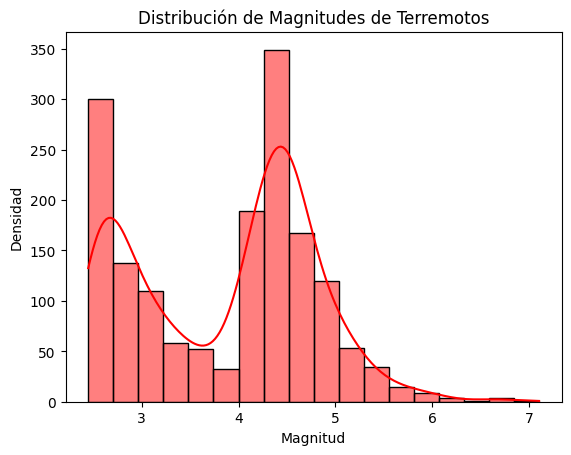

In [4]:
# Gráfico de densidad
sns.histplot(magnitudes, kde=True, color='r')
plt.title('Distribución de Magnitudes de Terremotos')
plt.xlabel('Magnitud')
plt.ylabel('Densidad')
plt.show()

A continuación, visualizamos como se distribuyen las magnitudes de los terremotos y compara esta distribución con una distribución normal. El ajuste de una distribución normal proporciona información sobre la tendencia central y la dispersión de las magnitudes. La visualización final permite una comparación visual entre la distribución de los datos reales y la distribución normal ajustada.

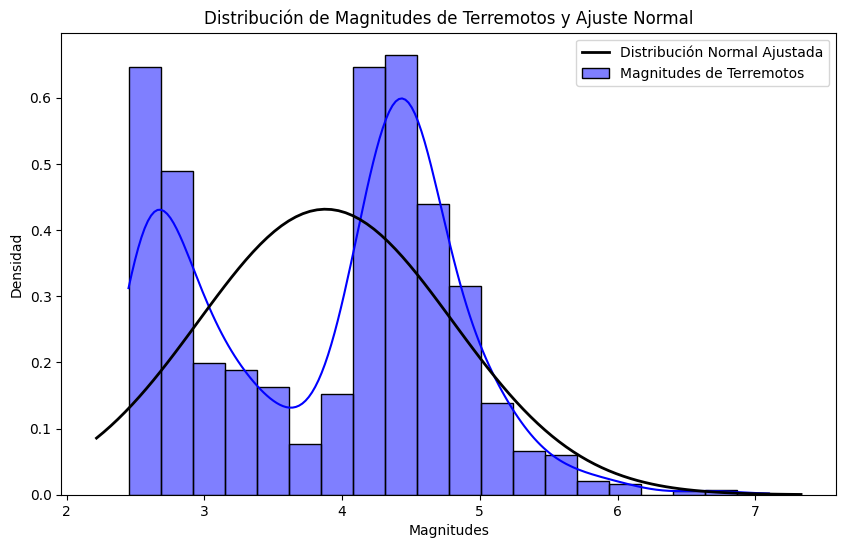

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Carga datos desde el CSV
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_month.csv"
data = pd.read_csv(url)

# Selección de  magnitudes
magnitudes = data['mag']

# Ajuste de distribución normal a las magnitudes
mu, std = norm.fit(magnitudes)

# Creación de histograma
plt.figure(figsize=(10, 6))
sns.histplot(magnitudes, kde=True, stat='density', color='blue', bins=20, label='Magnitudes de Terremotos')

# Añadir línea de la distribución normal ajustada
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Distribución Normal Ajustada')

plt.title('Distribución de Magnitudes de Terremotos y Ajuste Normal')
plt.xlabel('Magnitudes')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Este código presenta una visualización comparativa de las distribuciones de magnitudes de terremotos en regiones sísmicas específicas. En este ejemplo, nos enfocamos en los sismos ocurridos exclusivamente en Chile, incorporando información estadística, como el intervalo de confianza.



Intervalo de confianza para magnitudes: (4.3501763060565075, 4.593219920358587)


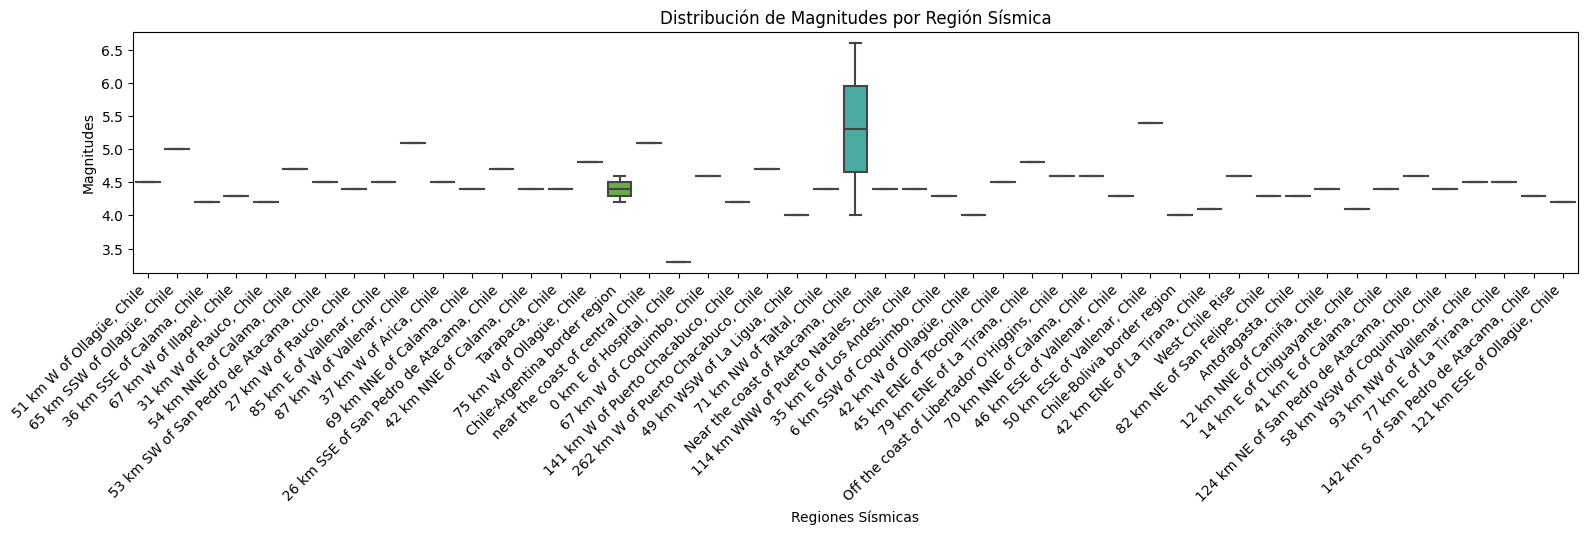

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Carga datos desde el CSV
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_month.csv"
data = pd.read_csv(url)

# Seleccion las columnas relevantes
regiones_sismicas = data['place']
magnitudes = data['mag']
profundidades = data['depth']

# Creacion DataFrame para facilitar el filtrado y visualización
df = pd.DataFrame({'Regiones Sísmicas': regiones_sismicas, 'Magnitudes': magnitudes, 'Profundidades': profundidades})

# Filtrar por regiones sísmicas específicas
regiones_interes = ['Chile']
df_filtrado = df[df['Regiones Sísmicas'].str.contains('|'.join(regiones_interes))]

# Calculo de intervalos de confianza para magnitudes
intervalo_confianza_magnitudes = stats.t.interval(0.95, len(df_filtrado['Magnitudes']) - 1,
                                                  loc=df_filtrado['Magnitudes'].mean(),
                                                  scale=stats.sem(df_filtrado['Magnitudes']))

#  Intervalo de confianza para magnitudes
print(f"Intervalo de confianza para magnitudes: {intervalo_confianza_magnitudes}")

# Visualizar distribuciones
plt.figure(figsize=(16, 8))

# Boxplot de magnitudes por región
plt.subplot(2, 1, 2)
sns.boxplot(x='Regiones Sísmicas', y='Magnitudes', data=df_filtrado)
plt.title('Distribución de Magnitudes por Región Sísmica')

plt.xticks(rotation=45, ha='right')  # Rotación de etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

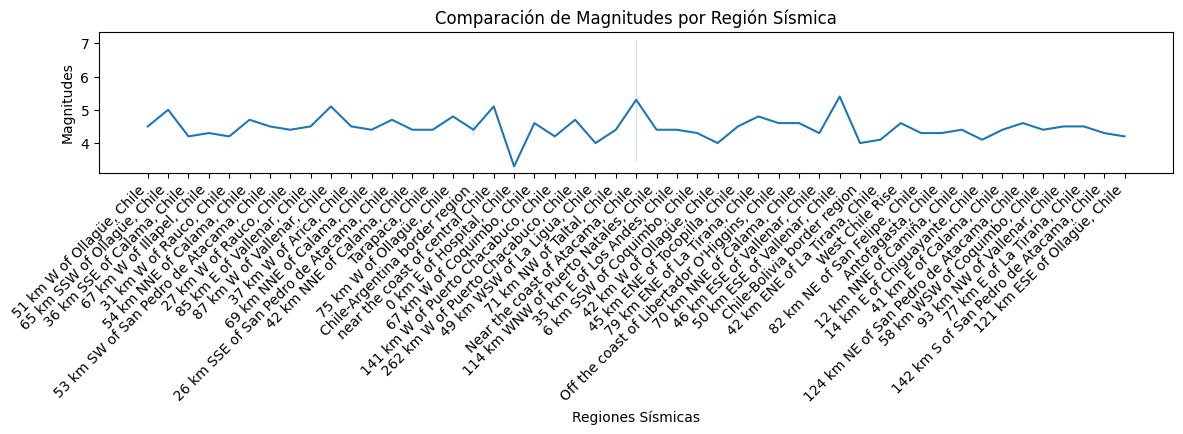

In [15]:
# Crear subgráfico para comparar distribuciones con lineplot
plt.figure(figsize=(12, 6))

# Lineplot de magnitudes promedio por región con intervalo de confianza
plt.subplot(2, 1, 2)
sns.lineplot(x='Regiones Sísmicas', y='Magnitudes', data=df_filtrado, errorbar='sd')
plt.title('Comparación de Magnitudes por Región Sísmica')
plt.xlabel('Regiones Sísmicas')
plt.ylabel('Magnitudes')

plt.xticks(rotation=45, ha='right')  # Rotación de etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

***

<font color='red'>__ATENCIÓN:__:<br>
Indicamos los caso de uso con el nombre del alumno.</font>

#<font color='blue'>**Caso de uso: Jorge Hueichán Rumián**</font>
##Módulo Estadística Inferencial: Caso de Uso "HierroExcel" #


**Introducción:**  
Minería HierroExcel se dedica a la extracción y suministro de mineral de hierro para la industria de fundición, con su principal yacimiento ubicado en Abedules.

La empresa se compromete activamente a mantener elevados estándares de calidad en la concentración de hierro de su mineral. Con un enfoque centrado en la innovación y la mejora continua, se emplean análisis estadísticos avanzados para optimizar la calidad del mineral y asegurar la eficiencia en los procesos de fundición. La toma de decisiones informada, respaldada por datos, se erige como un pilar fundamental para el éxito de la empresa. Se trabaja incesantemente en mejorar tanto la tecnología como las prácticas, con el objetivo de proporcionar a sus clientes en la industria metalúrgica un producto de la más alta calidad.

En línea con su visión de crecimiento, la empresa tiene planes para expandir sus puntos de explotación. En consecuencia, los directivos de la compañía tienen la determinación de asegurar los derechos de explotación de un nuevo yacimiento llamado Buenaventura.

Con la intención de explotar e invertir en este nuevo proyecto, se ha tomado la decisión de llevar a cabo un exhaustivo estudio de la calidad del mineral, especialmente en lo que respecta a su concentración. Se han comparado muestras de ambos yacimientos, arrojando los siguientes resultados en porcentaje.

Abedules : 43, 45, 42, 35, 37, 38, 33, 38, 41, 43, 34,43

Buenaventura : 39, 36, 35, 37, 40, 39, 40, 38, 35, 39, 38, 34

Un resultado favorable que indique una mejor concentración del mineral en el nuevo yacimiento determinará la desición de inversión.  

Se contrata a un equipo consultor para realizar el estudio y determinar los resultados.

**Desarrollo:**

In [ ]:
#Instalación de la librería pingouin
!pip install pingouin

In [ ]:
#Importación de módulos a utilizar y Carga de datos de ambas muestras
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import t
from scipy.stats import ttest_ind
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.stats.power as power
import seaborn as sns
import pingouin as pg

data_a = np.array([43, 45, 42, 35, 37, 38, 33, 38, 41, 43, 34, 43])  #data_a --> Abedules
data_b = np.array([39, 36, 35, 37, 40, 39, 40, 38, 35, 39, 38, 34])  #data_b --> Buenaventura

serie_a = pd.Series(data_a)
serie_b = pd.Series(data_b)

datos = pd.concat([serie_a, serie_b], axis=1)
datos.columns = ["data_a", "data_b"]

**Visualización de los datos**

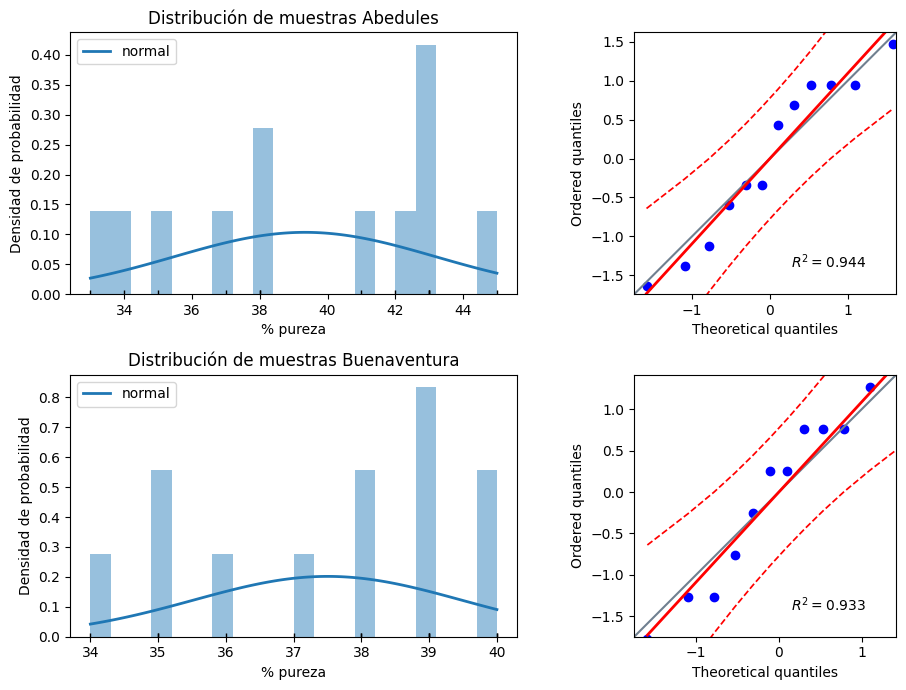

In [ ]:
# Gráficos de distribución
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

# Valores de la media (mu) y desviación típica (sigma)
mu, sigma = stats.norm.fit(datos['data_a'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(datos['data_a']), max(datos['data_a']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico distribución
axs[0, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[0, 0].hist(x=datos['data_a'], density=True, bins=20, color="#3182bd", alpha=0.5)
axs[0, 0].plot(datos['data_a'], np.full_like(datos['data_a'], -0.01), '|k', markeredgewidth=1)
axs[0, 0].set_title('Distribución de muestras Abedules')
axs[0, 0].set_xlabel('% pureza')
axs[0, 0].set_ylabel('Densidad de probabilidad')
axs[0, 0].legend()

# Gráfico distribución qq-plot
pg.qqplot(datos['data_a'], dist='norm', ax=axs[0, 1])

mu, sigma = stats.norm.fit(datos['data_b'])
x_hat = np.linspace(min(datos['data_b']), max(datos['data_b']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
axs[1, 0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[1, 0].hist(x=datos['data_b'], density=True, bins=20, color="#3182bd", alpha=0.5)
axs[1, 0].plot(datos['data_b'], np.full_like(datos['data_b'], -0.01), '|k', markeredgewidth=1)
axs[1, 0].set_title('Distribución de muestras Buenaventura')
axs[1, 0].set_xlabel('% pureza')
axs[1, 0].set_ylabel('Densidad de probabilidad')
axs[1, 0].legend()

#
pg.qqplot(datos['data_b'], dist='norm', ax=axs[1, 1])
plt.tight_layout();

Como se puede verificar en los gráficos QQ (quantil-quantil), los datos de las muetras se aproximan bastante a la recta diagonal, lo que indicaría que  siguen una distribución normal.

**Análisis**

Graficamos un histograma de ambas muestras. Nos damos cuenta que las muestras de Abedules en general tienden a una mayor probabilidad de riqueza o pureza del mineral.

Text(0, 0.5, 'probabilidad')

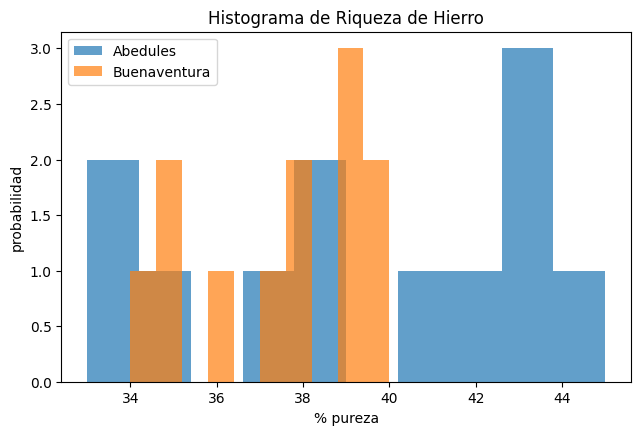

In [ ]:
# Histogramas
plt.figure(figsize=(25, 10))
plt.subplot(2, 3, 1)
plt.hist(data_a, bins=10, alpha=0.7, label='Abedules')
plt.hist(data_b, bins=10, alpha=0.7, label='Buenaventura')
plt.legend()
plt.title('Histograma de Riqueza de Hierro')
plt.xlabel('% pureza')
plt.ylabel('probabilidad')


**Primera prueba: T de dos Muestras:**

Con el objetivo de comparar las medias de los dos conjuntos de datos. Se asume que las varianzas son iguales y se asume un nivel significancia de de 0.05. Se procede a calcular el valor p asociado con la prueba, teniendo en cuenta la siguiente hipótesis.


**Formulación de la hipótesis.**
> H0: Las medias son iguales  
> H1: Las medias son diferentes

In [ ]:
# Prueba t de dos muestras asumiendo varianzas iguales
t_stat, p_value = ttest_ind(data_a, data_b, equal_var=True)

print(f"Estadístico t: {t_stat}")
print(f"Valor de p: {p_value}")

# Conclusión
alpha = 0.05
if p_value < alpha:
    print("Hay evidencia suficiente para rechazar la hipótesis nula.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")


Estadístico t: 1.4021507008477174
Valor de p: 0.174823192004528
No hay suficiente evidencia para rechazar la hipótesis nula.


**Resultado de la hipótesis**:  Se concluye que, no hay suficiente evidencia para rechazar la hipótesis nula, por lo tanto la calidad en ambos yacimientos sería muy similar.

**Segunda prueba: Cálculo de intervalos de Confianza:**

Se decide calcular los intervalos de confianza para las medias de cada muestra para tener una idea de la magnitud de las diferencias, se asume un nive de confianza de un 95%.

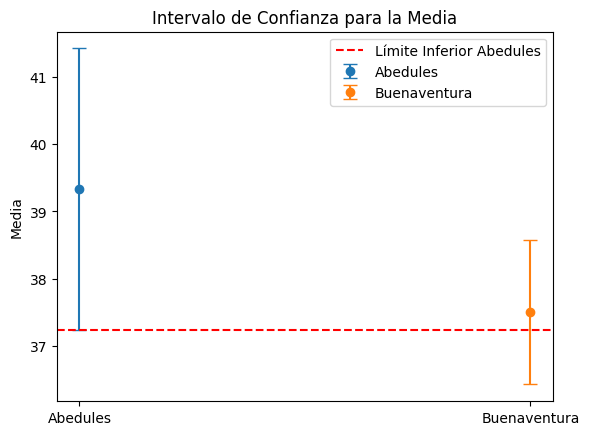

Intervalo de confianza para la media de Abedules: (37.24, 41.42)
Intervalo de confianza para la media de Buenaventura: (36.43, 38.57)


In [ ]:
# Nivel de confianza (por ejemplo, 95%)
confidence_level = 0.90

# Intervalo de confianza para la media de Abedules
mean_a, std_err_a = np.mean(data_a), np.std(data_a, ddof=1) / np.sqrt(len(data_a))
ci_a = t.interval(confidence_level, len(data_a) - 1, loc=mean_a, scale=std_err_a)

# Intervalo de confianza para la media de Buenaventura
mean_b, std_err_b = np.mean(data_b), np.std(data_b, ddof=1) / np.sqrt(len(data_b))
ci_b = t.interval(confidence_level, len(data_b) - 1, loc=mean_b, scale=std_err_b)

# Visualización
fig, ax = plt.subplots()
ax.errorbar(1, mean_a, yerr=(ci_a[1] - mean_a), fmt='o', label='Abedules', capsize=5)
ax.errorbar(2, mean_b, yerr=(ci_b[1] - mean_b), fmt='o', label='Buenaventura', capsize=5)


ax.axhline(ci_a[0], color='red', linestyle='--', label='Límite Inferior Abedules')

# Añadir etiquetas y título
ax.set_xticks([1, 2])
ax.set_xticklabels(['Abedules', 'Buenaventura'])
ax.set_ylabel('Media')
ax.set_title('Intervalo de Confianza para la Media')

# Añadir leyenda
ax.legend()

plt.show()

print(f"Intervalo de confianza para la media de Abedules: ({ci_a[0]:.2f}, {ci_a[1]:.2f})")
print(f"Intervalo de confianza para la media de Buenaventura: ({ci_b[0]:.2f}, {ci_b[1]:.2f})")

**Conclusión:**

Si la estimación resultante para el yacimiento Buenaventura es mas estrecho lo que indica que es mas preciso respecto de su media poblacional, además sus intervalos de confianza se superponen en una mayor parte de su longitud,  lo que indica que las diferencias no son distantes.

**Tercera prueba:** Se decide  medir el poder de la prueba de hipótesis.

In [ ]:
import statsmodels.stats.power as smp

# Tamaño de las muestras
n_abedules = len(data_a)
n_buenaventura = len(data_b)

# Nivel de significancia
alpha = 0.05

# Efecto esperado (diferencia de medias normalizada por la desviación estándar)
effect_size = np.abs(np.mean(data_a) - np.mean(data_b)) / np.sqrt(((n_abedules-1)*np.var(data_a, ddof=1) + (n_buenaventura-1)*np.var(data_b, ddof=1)) / (n_abedules + n_buenaventura - 2))

# Calcular el poder de la prueba
power = smp.tt_ind_solve_power(effect_size=effect_size, nobs1=n_abedules, alpha=alpha, ratio=n_buenaventura/n_abedules, alternative='two-sided')

# Imprimir el poder de la prueba
print(f'El poder de la prueba es: {power:.4f}')


El poder de la prueba es: 0.2685


**Conclusión:** El poder de la pueba 0.2685, es muy bajo de lo esperado(80%).   
Se calcula que un buen tamaño de muestreo sería de 64 muestras para un mejor análisis.

In [ ]:
import numpy as np
from statsmodels.stats.power import TTestIndPower

# Parámetros para la prueba de poder
effect_size = 0.5  # Tamaño de efecto deseado
alpha = 0.05  # Nivel de significancia
power = 0.80  # Poder deseado

# Crear objeto de prueba de poder para prueba t de dos muestras
power_analysis = TTestIndPower()

# Calcular tamaño de muestra necesario
sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)

print(f'Tamaño de muestra necesario: {round(sample_size)}')


Tamaño de muestra necesario: 64


**Análsis final:**   
Podemos concluir que, aunque el análisis inicial sugiere una similitud notable en la calidad entre el yacimiento de Buenaventura y el de Abedules, lo cual podría representar una oportunidad atractiva de inversión para la empresa minera, se recomienda llevar a cabo una revisión adicional con un mayor número de muestras. Idealmente, se propone replicar el estudio con una muestra más amplia, preferiblemente de 64 observaciones, antes de tomar una decisión definitiva. Este enfoque adicional fortalecerá la robustez de nuestras conclusiones y proporcionará una base más sólida para la evaluación de la viabilidad de la inversión.







<font color='red'> FIN CASOS DE USO<br>
</font>